<a href="https://colab.research.google.com/github/data2450/california-house-price-prediction/blob/main/FINAL%20EDA%20_on_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
test_d=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [4]:
train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [5]:
test_d.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [60]:
train['train_test'] = 1
test_d['train_test'] = 0
all_data = pd.concat([train,test_d])

%matplotlib inline
all_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'train_test'],
      dtype='object')

# EDA

In [62]:
all_data.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
 9   train_test          20000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [63]:
corr_matrix=all_data.corr()

In [64]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689109
total_rooms           0.135298
housing_median_age    0.104470
households            0.066573
total_bedrooms        0.051111
train_test            0.004495
population           -0.024234
longitude            -0.045788
latitude             -0.143969
Name: median_house_value, dtype: float64

In [65]:
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

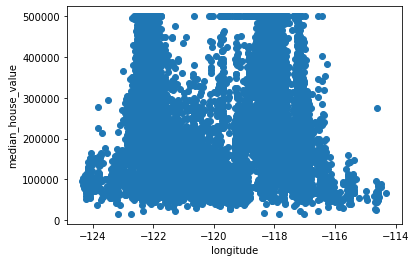

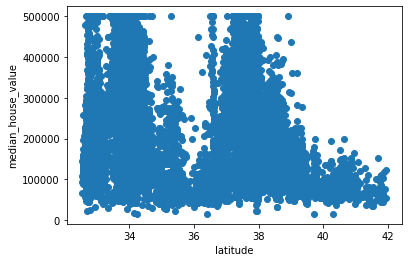

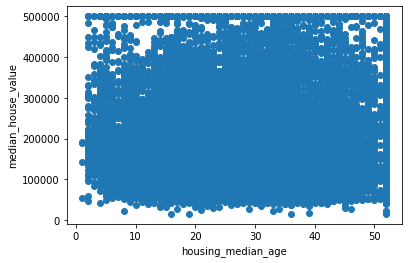

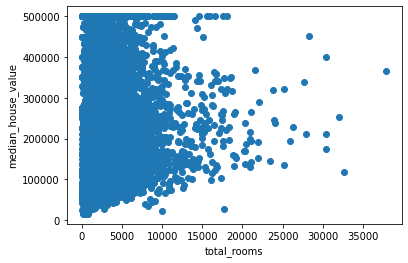

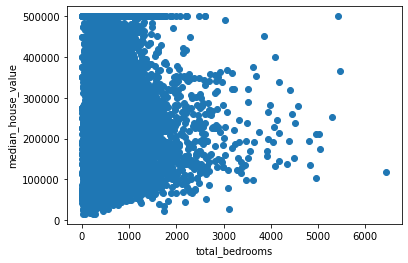

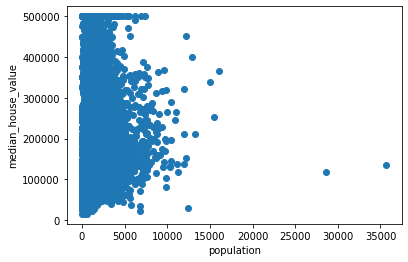

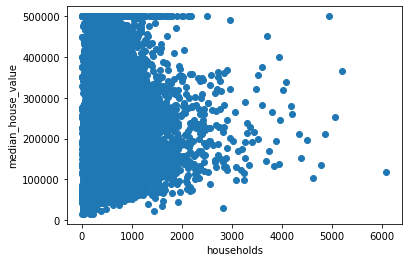

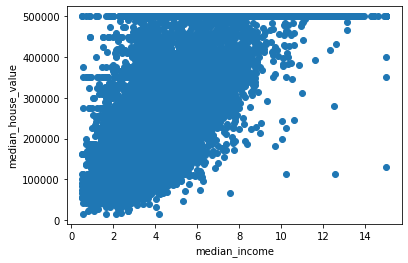

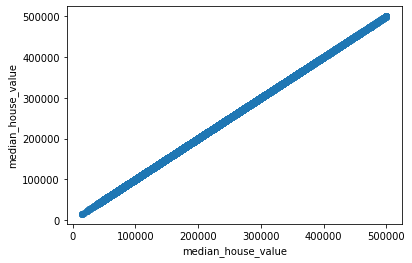

In [66]:
for feature in features:
        data=all_data.copy()
        plt.scatter(data[feature],data['median_house_value'])
        plt.xlabel(feature)
        plt.ylabel('median_house_value')
        plt.show()

Median Income is the most promising attribute to get Median Hosung Price

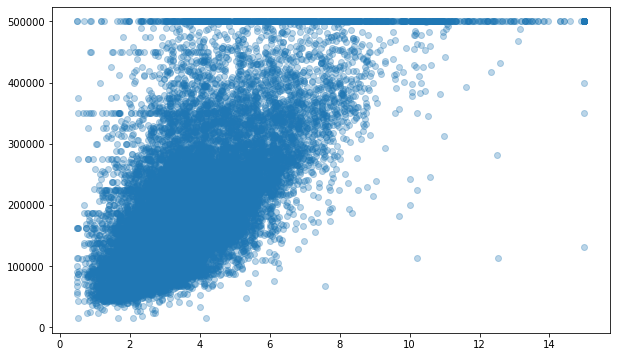

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(y=all_data['median_house_value'],x=all_data['median_income'],alpha=0.3)

A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model

## creating new features
1)rooms per household

2)bedrooms per room

3)population per household

Initially creating them on a copy of dataset and checing whether they are making any difference.

In [77]:
data1=all_data.copy()

In [84]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']

In [85]:
data1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,train_test,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1,11.889831,0.228617,2.150424


In [86]:
corr_matrix=data1.corr()

In [87]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689109
rooms_per_household         0.150485
total_rooms                 0.135298
housing_median_age          0.104470
households                  0.066573
total_bedrooms              0.051111
train_test                  0.004495
population                 -0.024234
population_per_household   -0.043154
longitude                  -0.045788
latitude                   -0.143969
bedrooms_per_room          -0.256400
Name: median_house_value, dtype: float64

It is clear that **rooms_per_household** and **bedrooms_per_room** have better correlation with** median_house_value** than **total_rooms** and **total_bedrooms**.
I have created classes for vindividual data manupulation job so that I can add then into a pipeline

In [73]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin



In [75]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42244996a0>]],
      dtype=object)

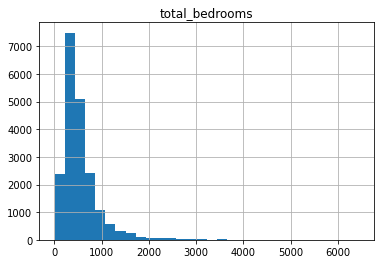

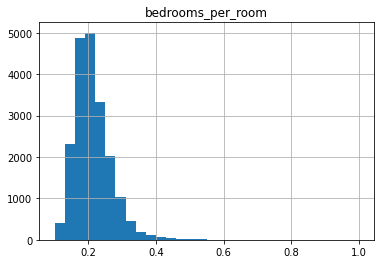

In [76]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

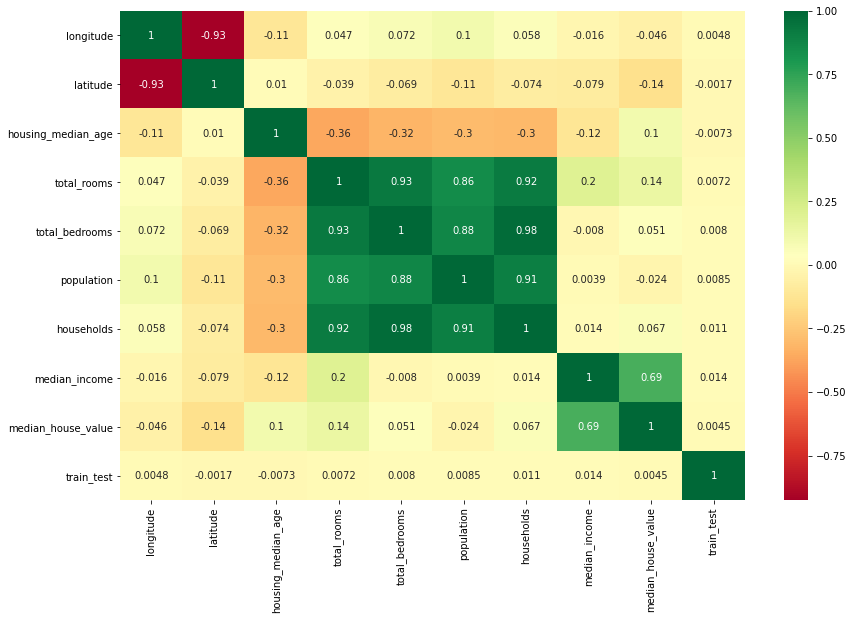

In [78]:
#lets look at the coorelation between the train dataset
import seaborn as sns
plt.figure(figsize = (14,9))
sns.heatmap(data1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [22]:
#lets take median_house_value as target value 
#but we can see multicollinearity between the feature varibles such as "population & house holds"
#total bedrooms & house holds 
#total rooms & total bedrooms

In [80]:
print(data1.shape)
data1.describe()


(20000, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,train_test
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750,0.85000
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856,0.35708
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.00000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000,1.00000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000,1.00000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000,1.00000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.00000


In [90]:
data1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'train_test', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [88]:
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','rooms_per_household','bedrooms_per_room','population_per_household']

# Outliers

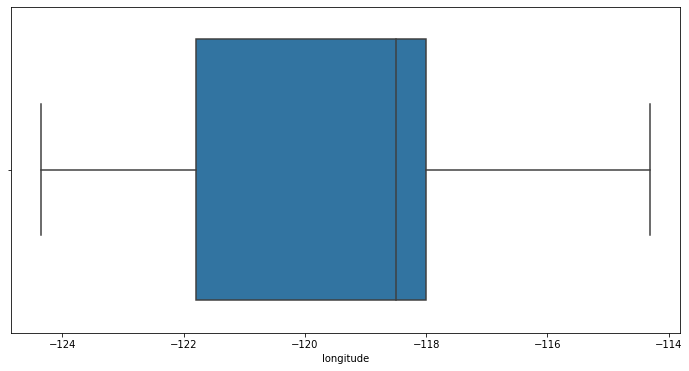

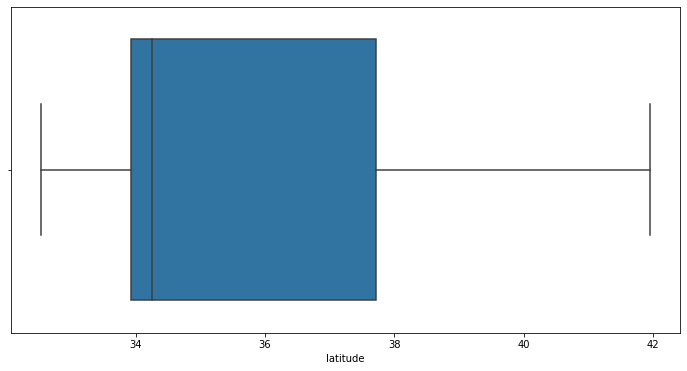

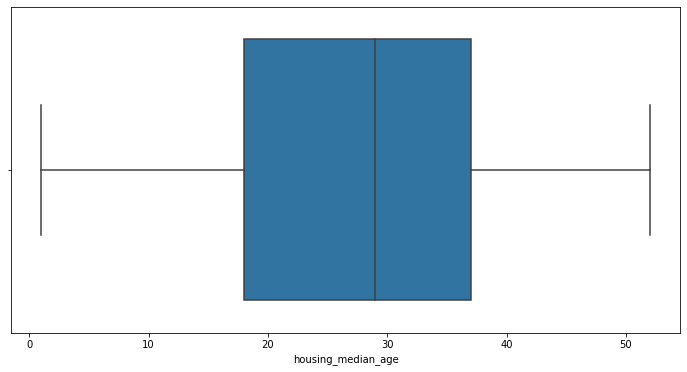

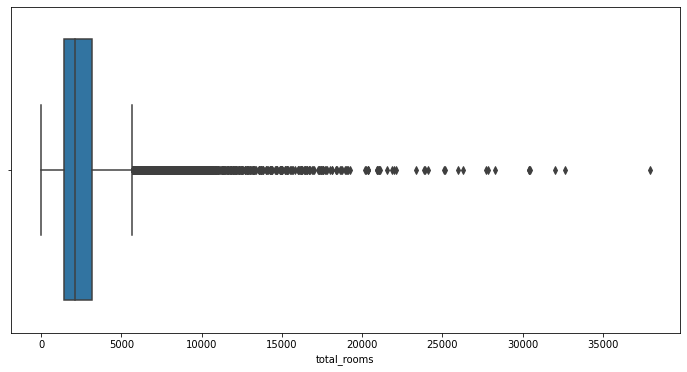

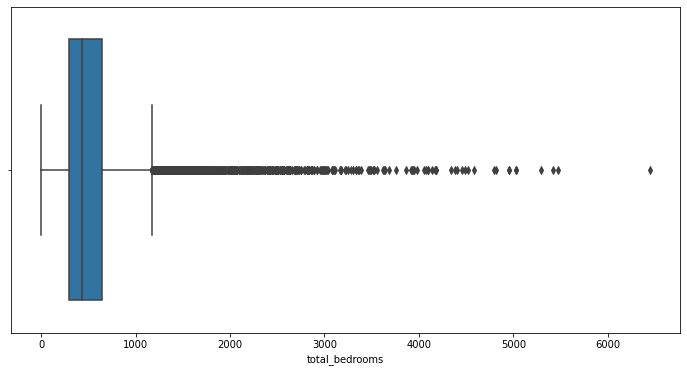

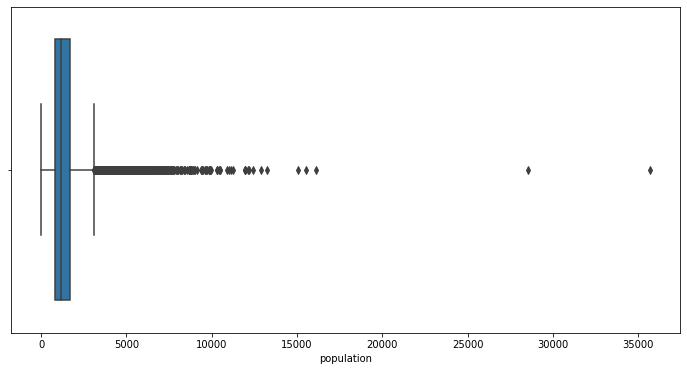

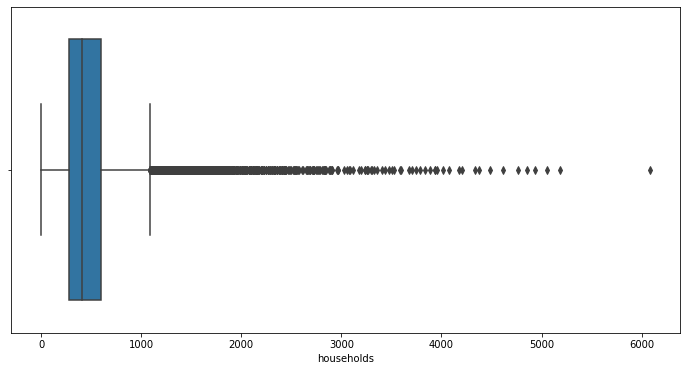

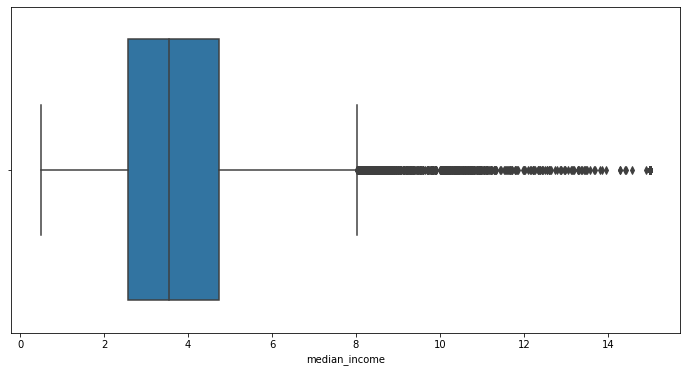

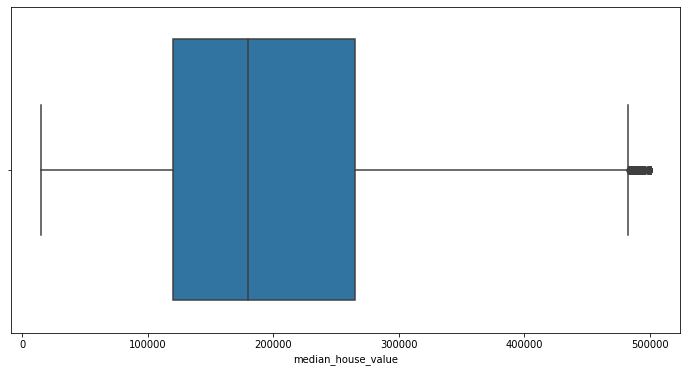

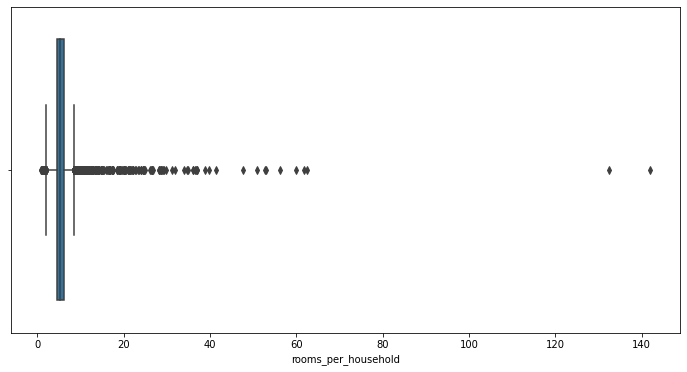

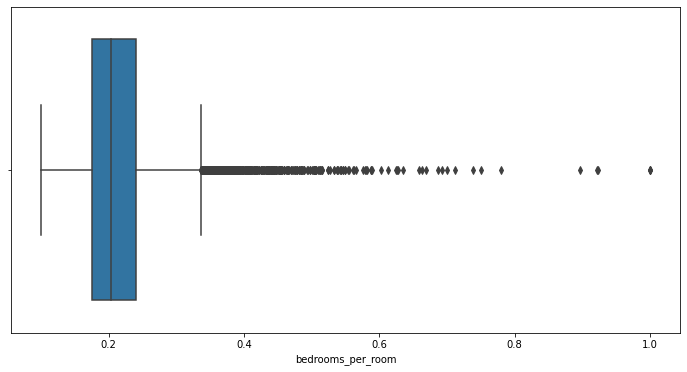

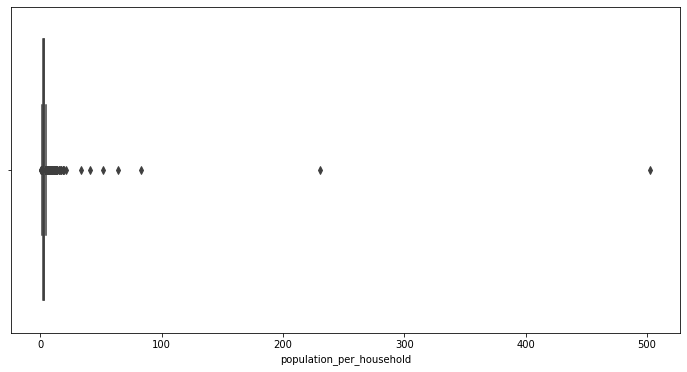

In [89]:
for i in features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data1,ax=ax)
#there are outliers    

By studying above box plots in details (I've not mentioned that in this notebook) as well as scatter plot of Median_House_Value vs. Median_Income, I decided following conditions to remove outliers.

I also used Tableau to get interactive plots

In [91]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X


In [92]:
data1=RemoveOutliers().fit_transform(data1)

In [93]:
data_labels=data1['median_house_value']
data1=data1.drop('median_house_value',axis=1)

## Transforming skewed features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42245914a8>,
      dtype=object)

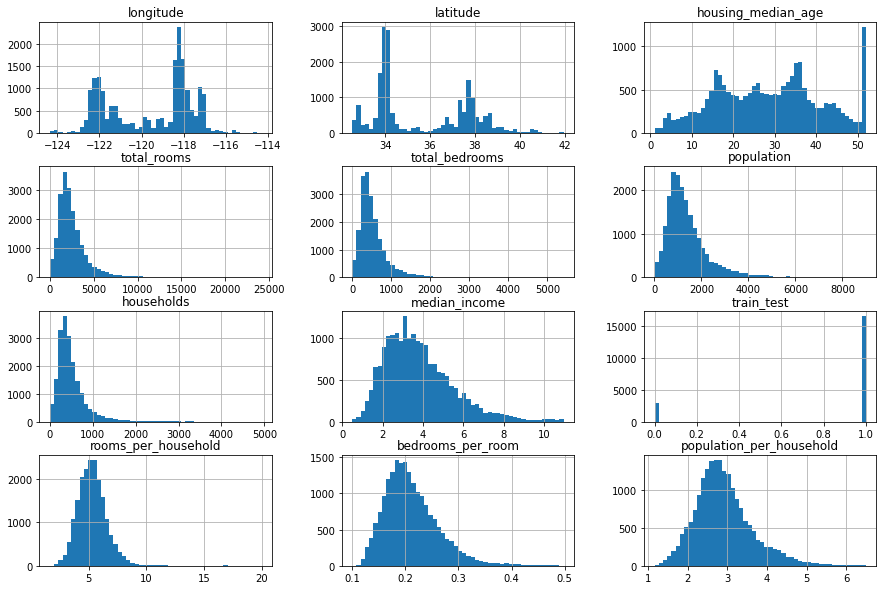

In [94]:
data1.hist(bins=50,figsize=(15,10))
#the data has come to somewhat normal

In [95]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [96]:
skewness=[]
for i in num_features:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
total_rooms,3.005099
total_bedrooms,2.767047
households,2.658374
population,2.446048
rooms_per_household,2.109572
bedrooms_per_room,1.172368
median_income,1.046068
population_per_household,0.896160
latitude,0.468999
housing_median_age,0.056314


I transformed features using log1p and boxcox1p functions.

boxcox1p is used for highly skewed features

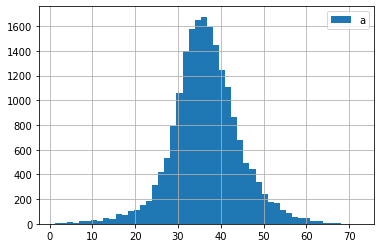

In [97]:
data1['households'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [98]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X

In [99]:
data1=FeaturesTransformer().fit_transform(data1)

**Transformed features**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4223eefcf8>,
      dtype=object)

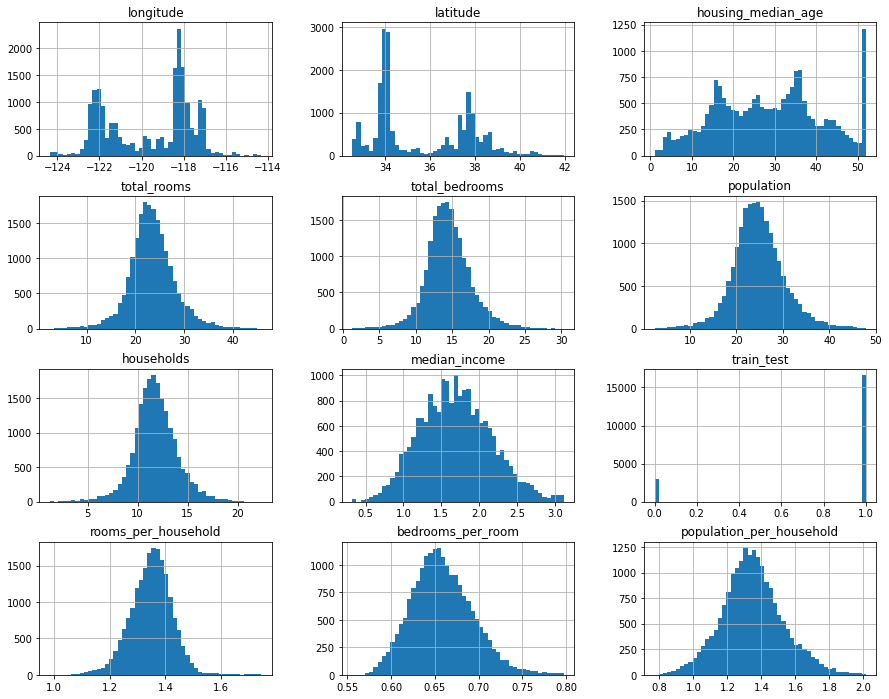

In [100]:
data1.hist(bins=50,figsize=(15,12))

## Getting dummy variables and Feature Scaling

In [101]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [103]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]

In [104]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']

In [105]:
imputer = SimpleImputer()

In [106]:
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])


    

In [107]:
data1=num_pipeline.fit_transform(data1)

In [47]:
#l=num_features.copy()
#l.extend([0,1,2])

In [108]:
data1=pd.DataFrame(data1,columns=num_features)

In [109]:
data1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,2.620804,-0.672374,-1.091392,1.540736,1.772216,-0.267453,0.173661,-1.676558,3.322034,0.425598,-1.108152
1,2.541081,-0.574150,-0.771730,2.137305,2.574104,-0.113226,0.144022,-1.354885,4.558883,0.789856,-0.623457
2,2.496237,-0.906239,-0.931561,-1.432912,-1.276281,-1.617465,-1.700320,-1.517861,0.721640,0.667655,-0.002622
3,2.491254,-0.929625,-1.171307,-0.539596,-0.431901,-1.142507,-0.881793,-0.256104,1.030734,0.347072,-0.886927
4,2.491254,-0.962366,-0.691814,-0.581783,-0.477739,-0.912749,-0.682399,-1.257377,0.299879,0.341125,-0.715689


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42231e4da0>,
      dtype=object)

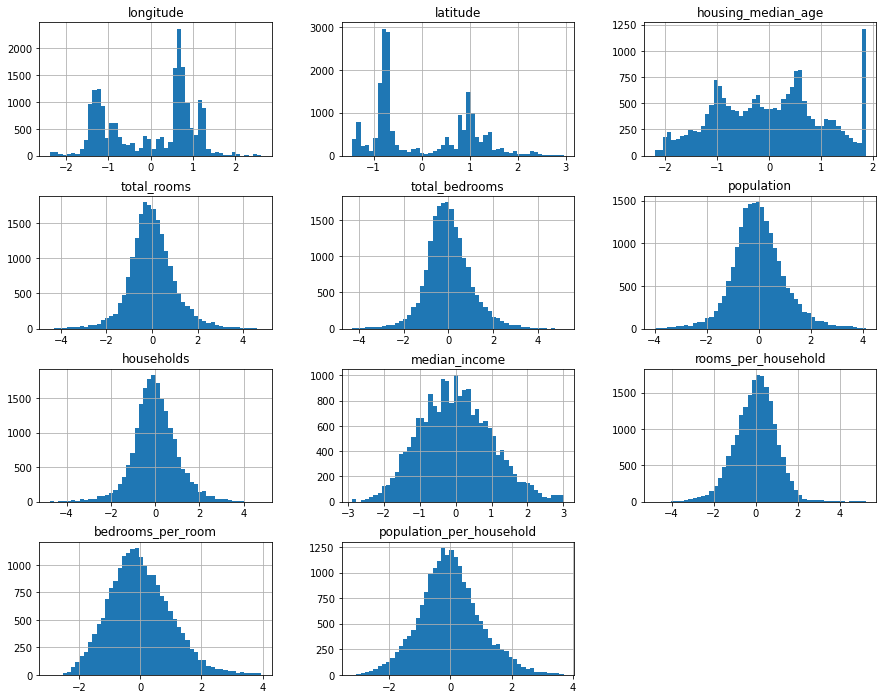

In [110]:
data1.hist(bins=50,figsize=(15,12))

**scaling target**

In [111]:
y=data_labels.copy()

In [112]:
label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y.values.reshape(-1,1))

In [113]:
data_labels1=pd.DataFrame(data_labels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f422431cda0>]],
      dtype=object)

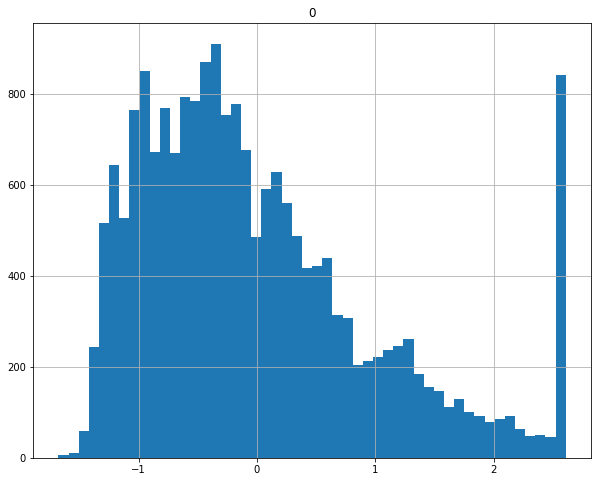

In [114]:
data_labels1.hist(bins=50,figsize=(10,8))

## Check for multicoliniearity

Here I have removed features having VIF (Variance Inflation Factor) greater than 5 and p-Values greater than 0.05 I have written following functions to do the job

**Variance Inflation Factor**

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

VIFs are usually calculated by software, as part of regression analysis. You’ll see a VIF column as part of the output. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. This gives you the R-squared values, which can then be plugged into the VIF formula. “i” is the predictor you’re looking at (e.g. x1 or x2):

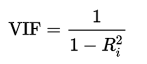


In [116]:
def get_vif(X):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.Series(index=X.columns,data=l).sort_values(ascending=False)
            
def remove_by_pvalue(X,y,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X: Array or dataframe excluding predicted variable
        y: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
        
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break


Get VIFs of all features

In [117]:
get_vif(data1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


total_bedrooms              527.044865
households                  372.755345
total_rooms                 284.182373
population                  139.927718
bedrooms_per_room            62.053108
rooms_per_household          46.286962
population_per_household     19.551684
latitude                     10.505356
longitude                     9.910511
median_income                 2.919411
housing_median_age            1.300740
dtype: float64

In [118]:
remove_by_vif(data1)

Removed:  total_bedrooms , VIF:  527.044865460488
Removed:  households , VIF:  227.00464185415933
Removed:  total_rooms , VIF:  105.66309943947242
Removed:  latitude , VIF:  10.494045207255974
Removed:  bedrooms_per_room , VIF:  5.415584078774061


In [119]:
remove_by_pvalue(data1,data_labels)

In [120]:
data1.columns

Index(['longitude', 'housing_median_age', 'population', 'median_income',
       'rooms_per_household', 'population_per_household'],
      dtype='object')

This is all the data manupulation I have done. Following is the summarization:

1.Adding new featues

2.Removing outliers

3.Transforming skewed features

4.Null value imputation

5.Dummy variables for ocean_proximity

6.Check for multicoloniearity

7.Standard scaling

I was unable to make a full pipeline for all above operations, so I decided to do them individually on data